In [7]:
import turicreate as tc
from turicreate import aggregate as agg
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
r = mw1.append(mw2)

In [168]:
mw = tc.load_sframe('../binarydata/funcs-encoded/')

In [169]:
ags = mw.groupby(key_column_names='apk', operations={'fcount': agg.COUNT()})

In [177]:
tpt_org = list(ags.sort(key_column_names='fcount')['fcount'])

In [170]:
fgs_o = mw.groupby(key_column_names='function', operations={'acount': agg.COUNT()})

In [184]:
fv_org = list(fgs_o.sort(key_column_names='acount')['acount'])

## Cluster results

For one parttion the distribtuion of functions and apks

In [152]:
apks = pd.read_csv('../res/clusterres/apks.csv', index_col=0)
new_apks = pd.read_csv('../res/newclusterres/apks.csv', index_col=0)

In [154]:
apks.shape[0], new_apks.shape[0]

(178056, 189452)

In [179]:
tpt = apks.sort_values(by='fcount')['fcount'].values
tpt2 = new_apks.sort_values(by='fcount')['fcount'].values

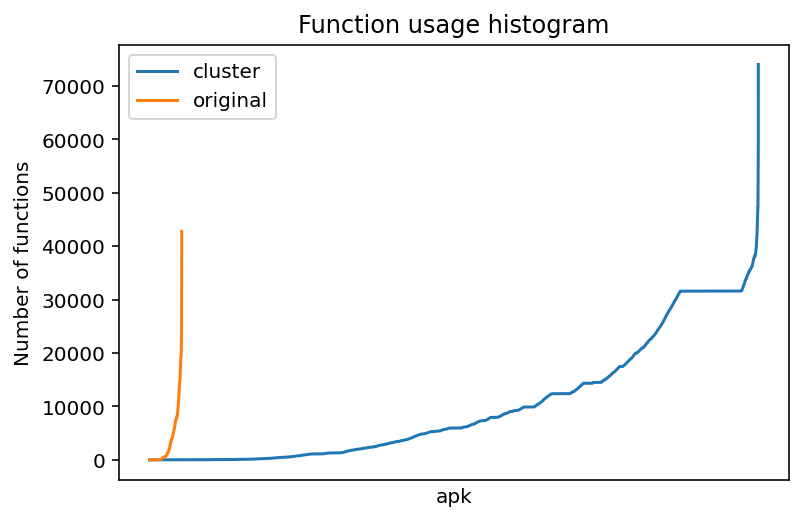

In [183]:
plt.title('Function usage histogram')
plt.ylabel('Number of functions')
plt.xlabel('apk')
plt.xticks([])
#plt.plot(tpt);
plt.plot(tpt2, label='cluster')
plt.plot(tpt_org, label='original')
plt.legend();
#plt.plot(ss['fcount'].values)

In [160]:
#fck = pd.read_csv('../res/clusterres/funcs.csv', index_col=0)
fck2 = pd.read_csv('../res/newclusterres/funcs.csv', index_col=0)

/Users/jj/miniconda3/envs/grap4/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [161]:
fck.shape[0], fck2.shape[0]

(11672315, 1052842)

In [15]:
fv = fck.sort_values(by='acount').values

In [164]:
fv2 = fck2.sort_values(by='acount').values

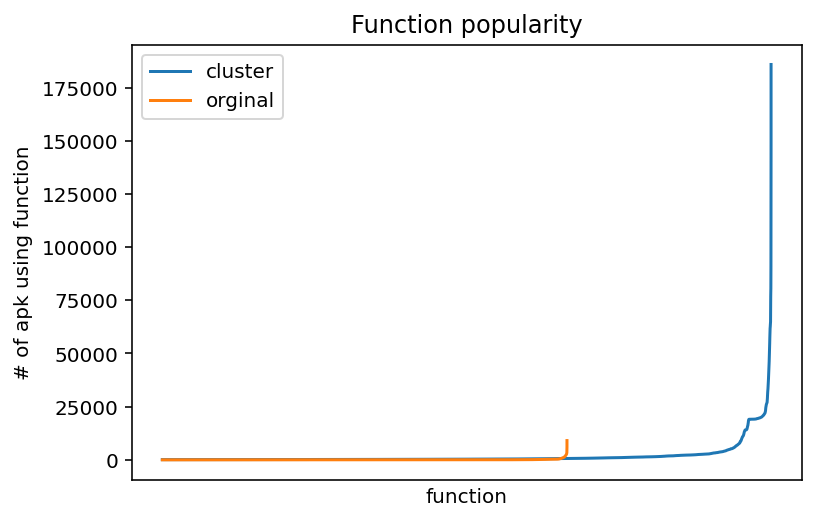

In [186]:
plt.title('Function popularity')
plt.ylabel('# of apk using function')
plt.xlabel('function')
plt.xticks([])
#plt.plot(fv);
plt.plot(fv2, label='cluster')
plt.plot(fv_org, label='orginal')
plt.legend();

In [196]:
max_org, max_fv = max(fv_org), max(fv2)[0]

normalized_fv = list(map(lambda x: x/max_fv, fv2))

normalized_org = list(map(lambda x: x/max_org, fv_org))

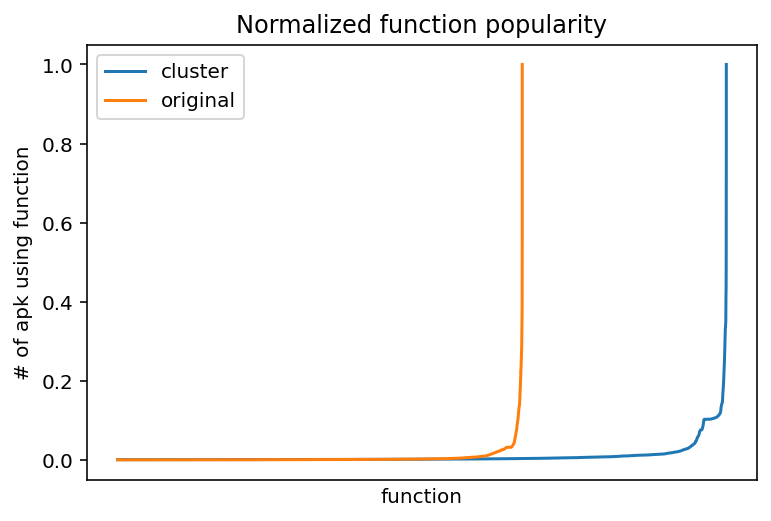

In [198]:
plt.title('Normalized function popularity')
plt.ylabel('# of apk using function')
plt.xlabel('function')
plt.xticks([])
#plt.plot(fv);
plt.plot(normalized_fv, label='cluster')
plt.plot(normalized_org, label='original')
#plt.plot(fv_org, label='orginal')
plt.legend();

In [39]:
#2021-05-02 22:25:13,331 root INFO Starting network creation with k=178056
a = """0.2-0-tc-nets.pickle 175245
0.4-0-tc-nets.pickle 175231
0.8-0-tc-nets.pickle 169598
0.84-0-tc-nets.pickle 167282
0.86-0-tc-nets.pickle 166289
0.88-0-tc-nets.pickle 165608
0.9-0-tc-nets.pickle 164271
0.92-0-tc-nets.pickle 162984
0.94-0-tc-nets.pickle 160890
0.96-0-tc-nets.pickle 155892"""

In [40]:
k1=178056
res = dict()
for r in a.split('\n'):
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res[g] = siz

In [21]:
## Cluster meged-01 (connected partition 0 and 1m)

In [35]:
k2 = 356112
a2 = """0.8400000000000001-1-tc-nets.pickle 332237
0.8800000000000001-1-tc-nets.pickle 328685
0.86-1-tc-nets.pickle 330316
0.9-1-tc-nets.pickle 325719
0.9199999999999999-1-tc-nets.pickle 322996
0.2-1-tc-nets.pickle 349454
0.4-1-tc-nets.pickle 349355
0.6-1-tc-nets.pickle 345038
0.8-1-tc-nets.pickle 337086"""

In [36]:
res2 = dict()
for r in a2.split('\n'):
    
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res2[g] = siz

In [37]:
res2 = dict(sorted(res2.items()))

In [53]:
k3=712224
a3 = """0.86-0-tc-nets.pickle 657832
0.2-0-tc-nets.pickle 697581
0.9-0-tc-nets.pickle 647733
0.8800000000000001-0-tc-nets.pickle 654294
0.4-0-tc-nets.pickle 697152
0.6-0-tc-nets.pickle 688169
0.8-0-tc-nets.pickle 670772
0.9400000000000001-0-tc-nets.pickle 631408
0.9199999999999999-0-tc-nets.pickle 641650
0.96-0-tc-nets.pickle 601591
0.82-0-tc-nets.pickle 665308
0.8400000000000001-0-tc-nets.pickle 661690"""

In [55]:
res3 = dict()
for r in a3.split('\n'):
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res3[g] = siz
    
res3 = dict(sorted(res3.items()))

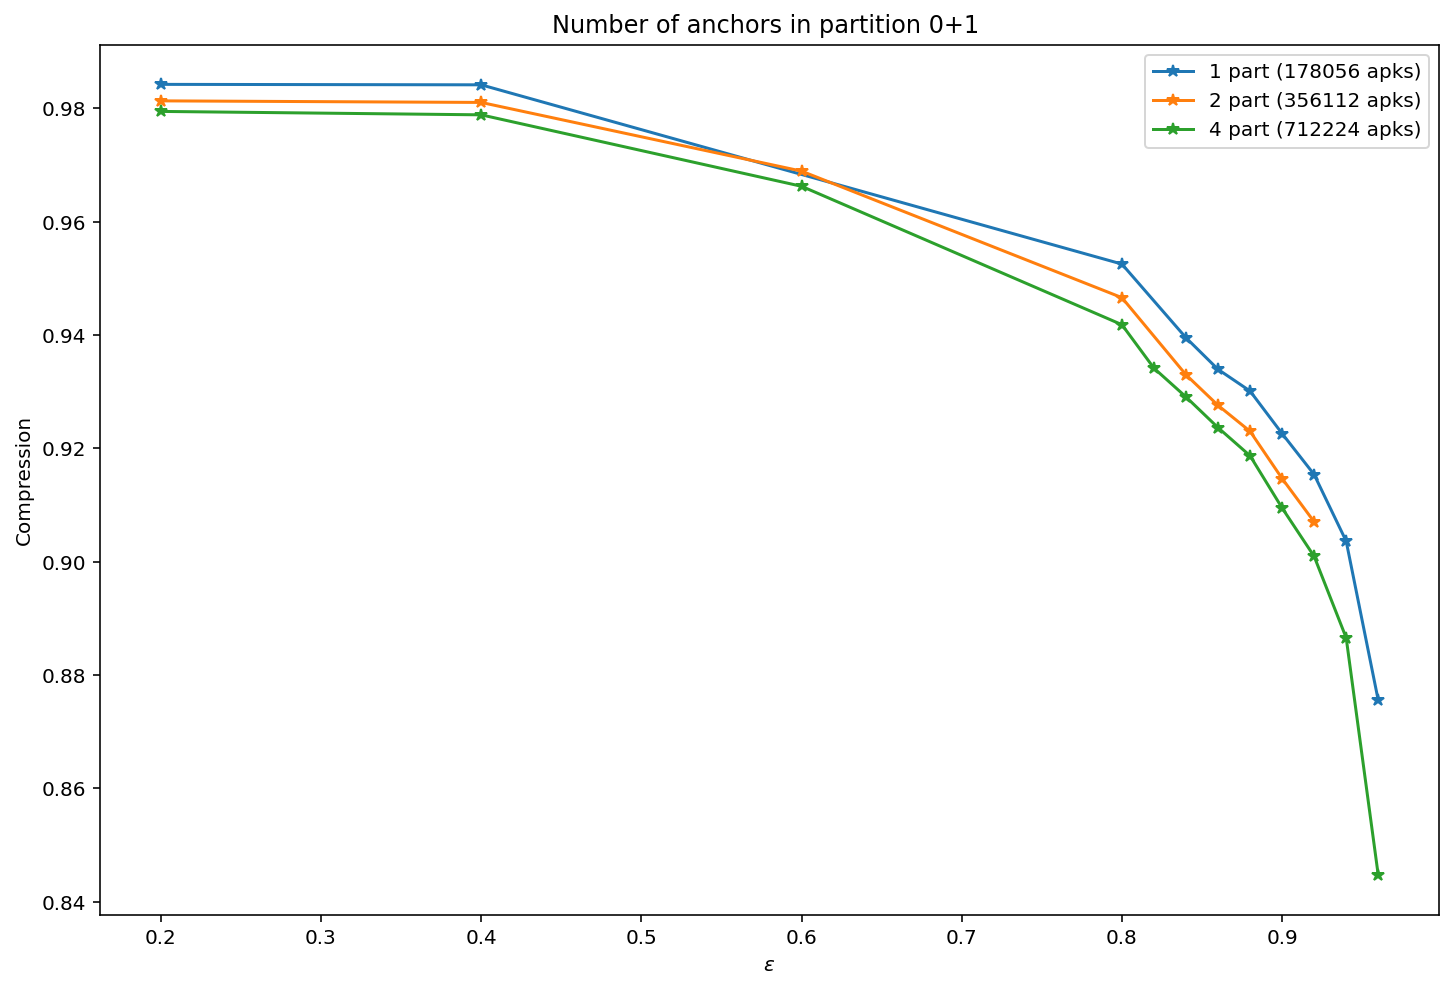

In [70]:
plt.figure(figsize=(12,8))
plt.title(f"Number of anchors in partition 0+1 ")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label=f"2 part ({k2} apks)");
plt.plot(res3.keys(), list(map(lambda x: x/k3, res3.values())),'-*', label=f"4 part ({k3} apks)");

plt.legend();


In [105]:
mw2 = tc.load_sframe('../binarydata/funcs-encoded')

In [107]:
apks = mw2['apk'].unique()

In [108]:
apks.head()

dtype: int
Rows: 10
[21855, 27112, 19584, 18357, 26561, 6769, 22258, 22239, 26175, 3988]

In [109]:
apks.save('/tmp/apks')

In [113]:
labels = pd.read_csv('../data/labels_encoded.csv', index_col=0)

In [115]:
labels.index

Int64Index([2803, 2804, 2805, 2808, 2809, 2811, 2813, 2814, 2815, 2818,
            ...
            9891, 9892, 9895, 9896, 9897, 9898, 9900, 9903, 9924, 9925],
           dtype='int64', name='apn', length=27718)

In [119]:
missing = apks.filter_by(values=list(labels.index), exclude=False)

In [122]:
missing.shape[0]

10003

In [124]:
hash(str.upper('3eaa8506f711bbd06882d1393a09d9a18e19932b06a600d004ffc6242f1322c8'))

6669746552599245811

In [127]:
labs =pd.read_csv('/Users/jj/Downloads/apks_labels_189452.csv')

In [128]:
labs

,apk,malware_label
0,495890350db38e853d35dbb1112c49a8bdda6fdf758151...,True
1,442d83aa458e17d57f608d9e9600619dae5af3b808da17...,True
2,a29c995e80c6c4562f43a713578538ccb9bb69bcebecec...,True
3,b534831cfe0026a11d814ea3c6a39425136c07a5f5f307...,True
4,60b62a92b211a7efa7e4b6e1ac72c52395d1182925a122...,True
...,...,...
189447,d3ac8a853d0e4ff09fd7aa2e780718ec72307f20835c71...,True
189448,fc58302b9c7d60194bdc034ad44358c7ec57f08f28e995...,True
189449,4420396f97a238abec06ddad539a7706806f4d54d5f450...,True
189450,780923d2b3850953493d305e5578f92721c320d32930d7...,False


In [129]:
labs['hapk'] = labs['apk'].apply(lambda x: hash(str.upper(x)))

In [130]:
labs

,apk,malware_label,hapk
0,495890350db38e853d35dbb1112c49a8bdda6fdf758151...,True,4794926434108677027
1,442d83aa458e17d57f608d9e9600619dae5af3b808da17...,True,1870815810618989562
2,a29c995e80c6c4562f43a713578538ccb9bb69bcebecec...,True,-2631581720792588547
3,b534831cfe0026a11d814ea3c6a39425136c07a5f5f307...,True,-8860254648922217953
4,60b62a92b211a7efa7e4b6e1ac72c52395d1182925a122...,True,-7966233141560815654
...,...,...,...
189447,d3ac8a853d0e4ff09fd7aa2e780718ec72307f20835c71...,True,-8225785502931605788
189448,fc58302b9c7d60194bdc034ad44358c7ec57f08f28e995...,True,7260714258541439323
189449,4420396f97a238abec06ddad539a7706806f4d54d5f450...,True,-5932999073514449958
189450,780923d2b3850953493d305e5578f92721c320d32930d7...,False,1409789819960155074


In [131]:
labs[labs['apk']=='3eaa8506f711bbd06882d1393a09d9a18e19932b06a600d004ffc6242f1322c8']

,apk,malware_label,hapk
148232,3eaa8506f711bbd06882d1393a09d9a18e19932b06a600...,True,6669746552599245811


In [132]:
import hashlib
hash_object = hashlib.md5(b'Hello World')
print(hash_object.hexdigest())

b10a8db164e0754105b7a99be72e3fe5


In [133]:
print(hashlib.algorithms_available)
print(hashlib.algorithms_guaranteed)

{'sha384', 'md4', 'sha512_224', 'sm3', 'sha224', 'sha3_512', 'md5', 'shake_256', 'sha256', 'shake_128', 'ripemd160', 'blake2b', 'sha3_256', 'blake2s', 'whirlpool', 'sha1', 'sha512', 'md5-sha1', 'sha3_224', 'sha512_256', 'mdc2', 'sha3_384'}
{'sha384', 'sha224', 'shake_128', 'blake2b', 'sha1', 'sha512', 'sha3_512', 'sha3_224', 'md5', 'sha3_256', 'blake2s', 'shake_256', 'sha3_384', 'sha256'}


8334676873

In [140]:
def calc_hash(x, digits=12):
    return int(hashlib.sha1(x.upper().encode("utf-8")).hexdigest(), 16) % (10 ** digits)
    

In [146]:
calc_hash(x='heldlo', digits=13)

7336931629934

In [138]:
m ='hhhsa'

In [139]:
m.upper()

'HHHSA'

In [147]:
labs['hapk'] = labs['apk'].apply(calc_hash)

In [148]:
labs['hapk']

0          94903101191
1         146649158666
2         127497550908
3          27068917439
4         163011928159
              ...     
189447    201878936663
189448    971423710145
189449    448653644617
189450    803430413083
189451    671726371502
Name: hapk, Length: 189452, dtype: int64

In [149]:
networks = list()
for i in range(0, 1):
    networks.append(i)

In [150]:
len(networks)

1

In [151]:
networks

[0]

In [206]:
a = [1, 2, 3, 4, 9]

In [208]:
origin = a[3]

In [209]:
del a[3]

In [210]:
a

[1, 2, 3, 9]

In [211]:
origin

4

In [212]:

a_path = '/storage/users/cnalab/apkdata-tanya/federated-sample-compression-results/networks-0.65/0.65-0-tc-nets.pickle'




In [213]:
a_path.replace('.pickle', '-voting.pickle')

'/storage/users/cnalab/apkdata-tanya/federated-sample-compression-results/networks-0.65/0.65-0-tc-nets-voting.pickle'